# IRIS CLASSIFICATION USING NAIVE BAYES CLASSIFIER

## IMPORT THE DATA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.csv')

## Exploratory Data Analysis and Data Preprocessing

### DATA PREPROCESSING

In [3]:
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail(5)

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [9]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [10]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df[df.duplicated()]

,sepal length,sepal width,petal length,petal width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


### DATA VISUALIZATION

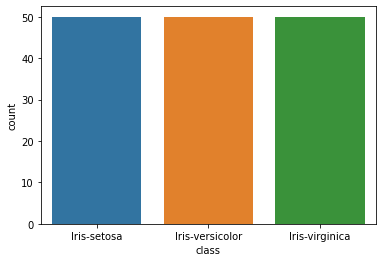

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.show()

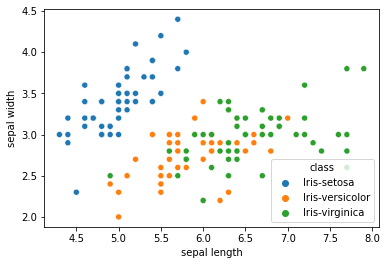

In [13]:
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=df)
plt.show()

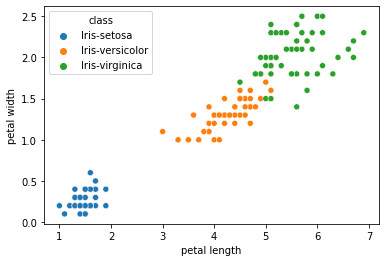

In [14]:
sns.scatterplot(x='petal length', y='petal width', hue='class', data=df)
plt.show()

C:\Users\hilma\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


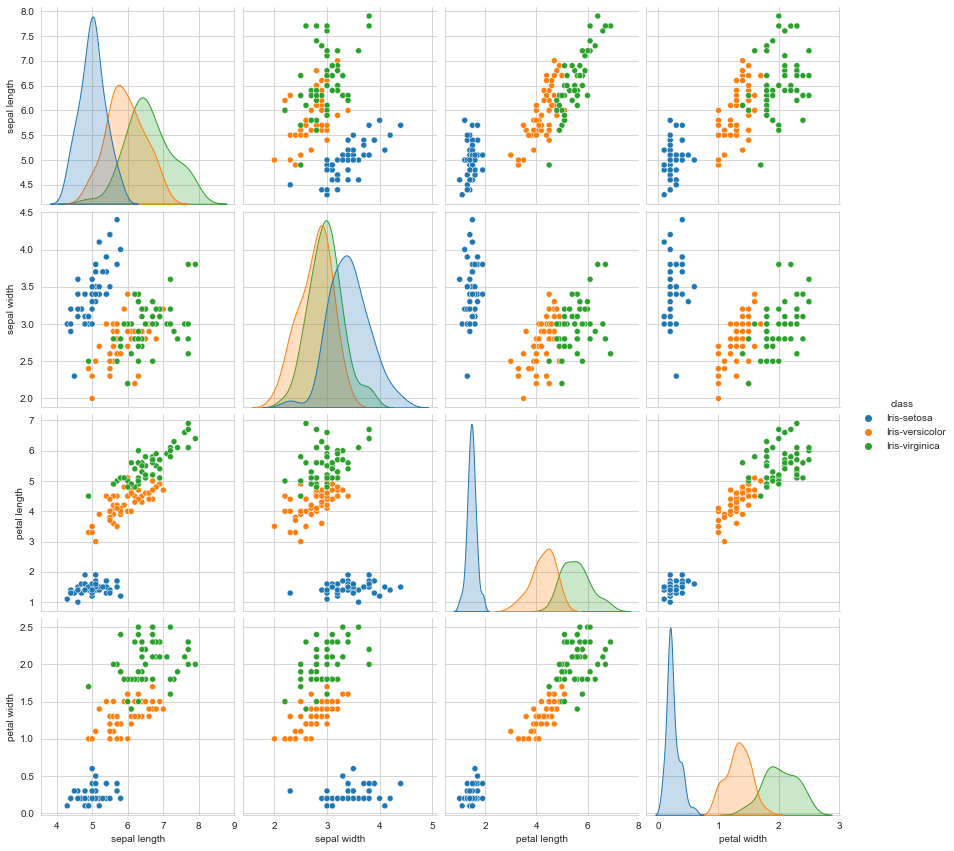

In [15]:
sns.set_style("whitegrid");
sns.pairplot(df,hue="class",size=3);
plt.show()

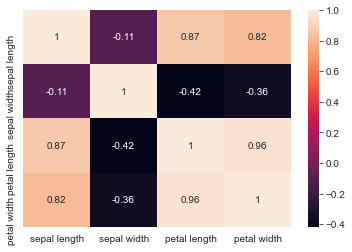

<Figure size 720x720 with 0 Axes>

In [16]:
sns.heatmap(df.corr(method='pearson'),annot = True)
plt.figure(figsize=(10,10))
plt.show()

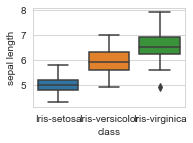

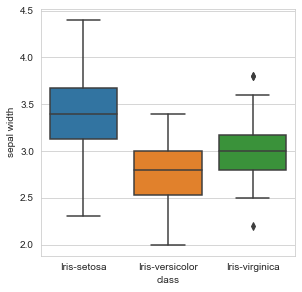

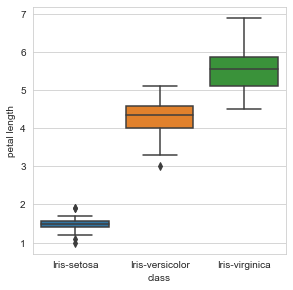

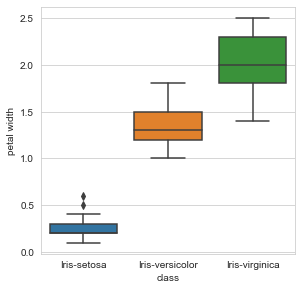

<Figure size 720x720 with 0 Axes>

In [17]:
def graph(y):
    sns.boxplot(x="class", y=y, data=df)
  
    plt.figure(figsize=(10,10))
      
plt.subplot(221)
graph('sepal length')
  
plt.subplot(222)
graph('sepal width')
  
plt.subplot(223)
graph('petal length')
  
plt.subplot(224)
graph('petal width')
  
plt.show()


### CHECKING OUTLIER

<AxesSubplot:xlabel='sepal width'>

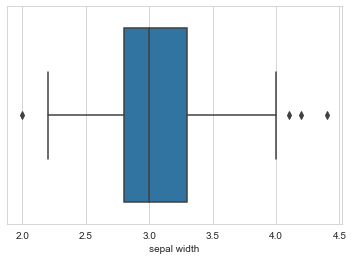

In [18]:
sns.boxplot(x='sepal width', data=df)

Old Shape:  (150, 5)
New Shape:  (146, 5)


<AxesSubplot:xlabel='sepal width'>

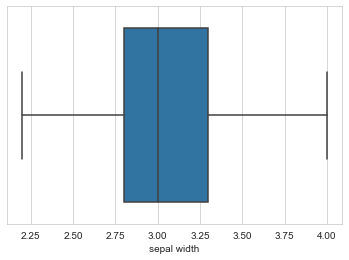

In [19]:
import numpy as np

Q1 = np.percentile(df['sepal width'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df['sepal width'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['sepal width'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(df['sepal width'] <= (Q1-1.5*IQR))

# Removing the Outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

sns.boxplot(x='sepal width', data=df)


## SPLIT DATA

In [23]:
X = df.iloc[:,:4].values
y = df['class'].values

In [24]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## SCALE THE DATA

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Naive Bayes Classifier

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9666666666666667


array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]], dtype=int64)